# **Prediction and Classification of Images using CNN**

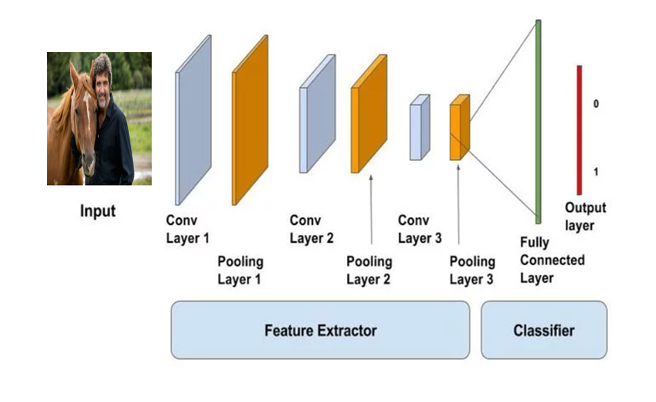

The dataset contains 500 rendered images of different types of horses in different stances in different locations. It additionally contains 527 rendered pictures of humans in different postures and areas. Emphasis has been taken to ensure diversity of humans, and to that end there are both men and women as well as Asian, Black, South Asian, and Caucasians present in the training set. The validation set adds 6 different figures of different gender, race and poses to ensure breadth of data

## **Objective of workbook**
Objective of workbook is to train a convolutional neural network which will predict and classify images in to two class which is human and horses.


Importing all the requried inbuilt python libraries which are requried to build the model

In [0]:
import os
import keras
import zipfile
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style  as style
from google.colab import files
from sklearn.metrics     import accuracy_score, roc_auc_score
from keras.layers        import Dense, Dropout, Flatten, MaxPooling2D,Convolution2D
from keras.models        import Sequential, Model, load_model
from keras.optimizers    import Adam, sgd, Adagrad
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


Importing training data set from url

In [0]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip \
    -O /tmp/horse-or-human.zip

--2020-04-24 22:32:02--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.164.176, 2607:f8b0:4004:803::2010
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.164.176|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 149574867 (143M) [application/zip]
Saving to: ‘/tmp/horse-or-human.zip’

/tmp/horse-or-human 100%[===================>] 142.65M   151MB/s    in 0.9s    

2020-04-24 22:32:03 (151 MB/s) - ‘/tmp/horse-or-human.zip’ saved [149574867/149574867]



Importing validation data set from url

In [0]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/validation-horse-or-human.zip \
    -O /tmp/validation-horse-or-human.zip 

--2020-04-24 22:32:09--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/validation-horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.253.63.128, 2607:f8b0:4004:803::2010
Connecting to storage.googleapis.com (storage.googleapis.com)|172.253.63.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11480187 (11M) [application/zip]
Saving to: ‘/tmp/validation-horse-or-human.zip’

/tmp/validation-hor 100%[===================>]  10.95M  72.0MB/s    in 0.2s    

2020-04-24 22:32:10 (72.0 MB/s) - ‘/tmp/validation-horse-or-human.zip’ saved [11480187/11480187]



Unziping the data by using Zip Library. The contents of the .zip are extracted to the base directory /tmp/horse-or-human, which in turn each contain horses and humans subdirectories.

In [0]:
local_zip = '/tmp/horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/horse-or-human')
local_zip = '/tmp/validation-horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/validation-horse-or-human')
zip_ref.close()

Defining the directories for the datasets

In [0]:
# Directory with our training horse pictures
train_horse_dir = os.path.join('/tmp/horse-or-human/horses')

# Directory with our training human pictures
train_human_dir = os.path.join('/tmp/horse-or-human/humans')

# Directory with our training horse pictures
validation_horse_dir = os.path.join('/tmp/validation-horse-or-human/horses')

# Directory with our training human pictures
validation_human_dir = os.path.join('/tmp/validation-horse-or-human/humans')

Verifying first 10 filenames from each folder.

In [0]:
train_horse_names = os.listdir(train_horse_dir)
print(train_horse_names[:10])

train_human_names = os.listdir(train_human_dir)
print(train_human_names[:10])

validation_horse_hames = os.listdir(validation_horse_dir)
print(validation_horse_hames[:10])

validation_human_names = os.listdir(validation_human_dir)
print(validation_human_names[:10])

['horse12-3.png', 'horse15-5.png', 'horse06-2.png', 'horse31-2.png', 'horse11-0.png', 'horse07-3.png', 'horse04-6.png', 'horse15-3.png', 'horse19-4.png', 'horse45-9.png']
['human16-28.png', 'human03-21.png', 'human01-10.png', 'human02-11.png', 'human08-00.png', 'human02-19.png', 'human17-23.png', 'human13-07.png', 'human12-00.png', 'human08-13.png']
['horse2-314.png', 'horse2-269.png', 'horse6-275.png', 'horse6-345.png', 'horse5-123.png', 'horse4-503.png', 'horse3-198.png', 'horse2-218.png', 'horse3-541.png', 'horse4-599.png']
['valhuman02-07.png', 'valhuman05-08.png', 'valhuman02-08.png', 'valhuman03-23.png', 'valhuman01-04.png', 'valhuman02-22.png', 'valhuman02-23.png', 'valhuman03-17.png', 'valhuman05-04.png', 'valhuman05-25.png']


Verifying total numbers of images of horses and human present in each folder

In [0]:
print('total training horse images:', len(os.listdir(train_horse_dir)))
print('total training human images:', len(os.listdir(train_human_dir)))
print('total validation horse images:', len(os.listdir(validation_horse_dir)))
print('total validation human images:', len(os.listdir(validation_human_dir)))

total training horse images: 500
total training human images: 527
total validation horse images: 128
total validation human images: 128


Configuring matplotlib for verifying images from dataset.

In [0]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0

Display 8 picture of humans and 8 pictures of horses.


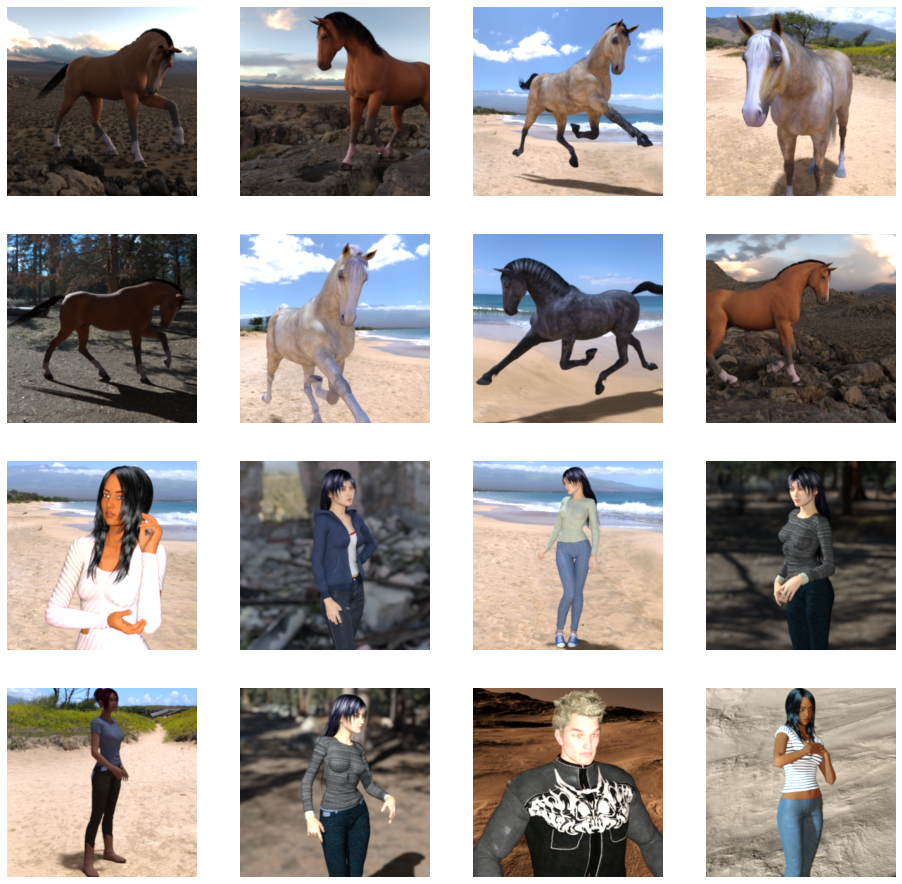

In [0]:
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_horse_pix = [os.path.join(train_horse_dir, fname) 
                for fname in train_horse_names[pic_index-8:pic_index]]
next_human_pix = [os.path.join(train_human_dir, fname) 
                for fname in train_human_names[pic_index-8:pic_index]]

for i, img_path in enumerate(next_horse_pix+next_human_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()


### Asigning values to Batch Size and Input size of Input Images to Neural 

In [0]:
batch_size = 128
input_size = (300,300)

Normalizing the dataset using *rescale*  paramerter. *ImageDataGenerator* allows you to instantiate generators of augmented image batches via .flow_from_directory(directory)

In [0]:

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1/255)
validation_datagen = ImageDataGenerator(rescale=1/255)

# Flow training images in batches of 128 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        '/tmp/horse-or-human/',  # This is the source directory for training images
        target_size=(300, 300),  # All images will be resized to 150x150
        batch_size=128,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

# Flow training images in batches of 128 using train_datagen generator
validation_generator = validation_datagen.flow_from_directory(
        '/tmp/validation-horse-or-human/',  # This is the source directory for training images
        target_size=(300, 300),  # All images will be resized to 150x150
        batch_size=32,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

Found 1027 images belonging to 2 classes.
Found 256 images belonging to 2 classes.


## **Building CNN model from Scratch**



#### **About Model**
*   Initializing the model using Sequential function.
*   Below model is having 5 *2-dimensional convolutional layers*, each with a *pooling layer* following it. The first layer uses 16 nodes, and *kernel* or *filter* size for all layers is 3 squared pixels.

*   Activation function is present in convolutional layer to increase non-linearity in the model.   
*   A *flatten* layer that turns the inputs into a vector
*   A *dense* layer that takes that vector and generates probabilities for 2 target labels, using a Softmax activation function.
*   A *dropout* layer is used in the model to avoid overfitting in the model.



### **Compiling the model**
Compile the model, providing three parameters:


*   Optimizer: It is used to change the attribute of Neural Network like weight and learning rate to reduce losses.  
*   Loss function: It is distance between o/p of sigmoid function and original true value. Here we have used binary_crossentropy as we are classifying the output into 2 category.
*   Metrics: use the ‘accuracy’ metric to get an accuracy score when the model runs on the validation set.


#### **Base Model**

In [0]:
model = Sequential()
model.add(Convolution2D(16, (3,3), activation='relu', input_shape=(300, 300, 3)))
model.add(MaxPooling2D(pool_size = (2,2))) 
# The second convolution
model.add(Convolution2D(32, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size = (2,2))) 
# The third convolution
model.add(Convolution2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size = (2,2))) 
# The fourth convolution
model.add(Convolution2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size = (2,2))) 
# The fifth convolution
model.add(Convolution2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size = (2,2))) 
# Flatten the results to feed into a DNN
model.add(Flatten())
# 512 neuron hidden layer
model.add(Dense(512, activation = "relu",init = 'normal'))
# Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('horses') and 1 for the other ('humans')
model.add(Dropout(0.3))
model.add(Dense(1, activation = "sigmoid"))

model.compile(optimizer = 'adam',loss = 'binary_crossentropy', metrics = ['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 298, 298, 16)      448       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 149, 149, 16)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 147, 147, 32)      4640      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 71, 71, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 35, 35, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 33, 33, 64)       

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(512, activation="relu", kernel_initializer="normal")`


### **Training the model**
Train the model using the .fit() function, providing the training data, validation data, the number of epochs(the number of times training should be repeated on the data), steps_per_epoch and validation_steps.

### **Plot** 
Demonstrates comparision between training accuracy and validation accuracy, and training loss and validation loss. 

Epoch 1/15
8/8 [==============================] - 12s 2s/step - loss: 0.6683 - accuracy: 0.6051 - val_loss: 0.7090 - val_accuracy: 0.4531
Epoch 2/15
8/8 [==============================] - 6s 771ms/step - loss: 0.4355 - accuracy: 0.8057 - val_loss: 0.3384 - val_accuracy: 0.8438
Epoch 3/15
8/8 [==============================] - 5s 612ms/step - loss: 0.1890 - accuracy: 0.9238 - val_loss: 0.7377 - val_accuracy: 0.7656
Epoch 4/15
8/8 [==============================] - 6s 707ms/step - loss: 0.1082 - accuracy: 0.9600 - val_loss: 1.0275 - val_accuracy: 0.8906
Epoch 5/15
8/8 [==============================] - 6s 763ms/step - loss: 0.0983 - accuracy: 0.9499 - val_loss: 0.1628 - val_accuracy: 0.8125
Epoch 6/15
8/8 [==============================] - 6s 806ms/step - loss: 0.0659 - accuracy: 0.9775 - val_loss: 0.6405 - val_accuracy: 0.8594
Epoch 7/15
8/8 [==============================] - 6s 730ms/step - loss: 0.0542 - accuracy: 0.9766 - val_loss: 3.4300 - val_accuracy: 0.6719
Epoch 8/15
8/8 [======

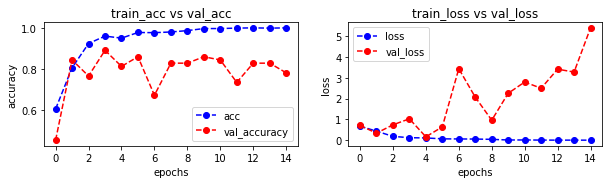

In [0]:

history = model.fit(
      train_generator,
      steps_per_epoch=train_generator.samples // batch_size,  
      epochs=15,
      verbose=1,
      validation_data = validation_generator,
      validation_steps=validation_generator.samples // batch_size)

# ---------------------------------------------------------------------------------------------#
fig = plt.figure(figsize=(10,5))
hist = model.history.history

# Plot accuracy
plt.subplot(221)
plt.plot(hist['accuracy'],'bo--', label = "acc")
plt.plot(hist['val_accuracy'], 'ro--', label = "val_accuracy")
plt.title("train_acc vs val_acc")
plt.ylabel("accuracy")
plt.xlabel("epochs")
plt.legend()

# Plot loss function
plt.subplot(222)
plt.plot(hist['loss'],'bo--', label = "loss")
plt.plot(hist['val_loss'], 'ro--', label = "val_loss")
plt.title("train_loss vs val_loss")
plt.ylabel("loss")
plt.xlabel("epochs")

plt.legend()
plt.show()

#### **Changed Activation function in base model**

In [0]:
model1 = Sequential()
model1.add(Convolution2D(16, (3,3), activation='tanh', input_shape=(300, 300, 3)))
model1.add(MaxPooling2D(pool_size = (2,2))) 
# The second convolution
model1.add(Convolution2D(32, (3,3), activation='tanh'))
model1.add(MaxPooling2D(pool_size = (2,2))) 
# The third convolution
model1.add(Convolution2D(64, (3,3), activation='tanh'))
model1.add(MaxPooling2D(pool_size = (2,2))) 
# The fourth convolution
model1.add(Convolution2D(64, (3,3), activation='tanh'))
model1.add(MaxPooling2D(pool_size = (2,2))) 
# The fifth convolution
model1.add(Convolution2D(64, (3,3), activation='tanh'))
model1.add(MaxPooling2D(pool_size = (2,2))) 
# Flatten the results to feed into a DNN
model1.add(Flatten())
# 512 neuron hidden layer
model1.add(Dense(512, activation = "tanh",init = 'normal'))
# Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('horses') and 1 for the other ('humans')
model1.add(Dropout(0.3))
model1.add(Dense(1, activation = "sigmoid"))

model1.compile(optimizer = 'adam',loss = 'binary_crossentropy', metrics = ['accuracy'])
model1.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 298, 298, 16)      448       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 149, 149, 16)      0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 147, 147, 32)      4640      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 71, 71, 64)        18496     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 35, 35, 64)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 33, 33, 64)       

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(512, activation="tanh", kernel_initializer="normal")`


Epoch 1/15
8/8 [==============================] - 6s 804ms/step - loss: 3.2283 - accuracy: 0.1935 - val_loss: 0.5176 - val_accuracy: 0.8906
Epoch 2/15
8/8 [==============================] - 6s 757ms/step - loss: 0.7039 - accuracy: 0.6618 - val_loss: 0.7101 - val_accuracy: 0.6953
Epoch 3/15
8/8 [==============================] - 6s 761ms/step - loss: 0.6382 - accuracy: 0.6196 - val_loss: 0.0621 - val_accuracy: 0.8359
Epoch 4/15
8/8 [==============================] - 7s 841ms/step - loss: 0.3458 - accuracy: 0.8711 - val_loss: 8.8151e-05 - val_accuracy: 0.6055
Epoch 5/15
8/8 [==============================] - 6s 754ms/step - loss: 0.2952 - accuracy: 0.8665 - val_loss: 0.0025 - val_accuracy: 0.8008
Epoch 6/15
8/8 [==============================] - 6s 763ms/step - loss: 0.1762 - accuracy: 0.9388 - val_loss: 3.2653e-04 - val_accuracy: 0.7539
Epoch 7/15
8/8 [==============================] - 6s 759ms/step - loss: 0.1228 - accuracy: 0.9466 - val_loss: 4.3511e-05 - val_accuracy: 0.7461
Epoch 8/

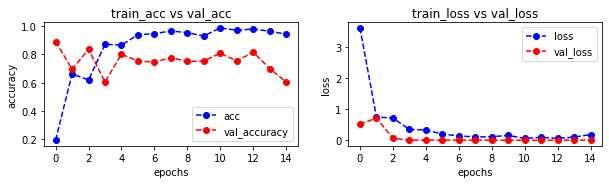

In [0]:
history = model1.fit(
      train_generator,
      steps_per_epoch=train_generator.samples // batch_size,  
      epochs=15,
      verbose=1,
      validation_data = validation_generator,
      validation_steps=validation_generator.samples // batch_size)

# ---------------------------------------------------------------------------------------------#
fig = plt.figure(figsize=(10,5))
hist = model1.history.history

# Plot accuracy
plt.subplot(221)
plt.plot(hist['accuracy'],'bo--', label = "acc")
plt.plot(hist['val_accuracy'], 'ro--', label = "val_accuracy")
plt.title("train_acc vs val_acc")
plt.ylabel("accuracy")
plt.xlabel("epochs")
plt.legend()

# Plot loss function
plt.subplot(222)
plt.plot(hist['loss'],'bo--', label = "loss")
plt.plot(hist['val_loss'], 'ro--', label = "val_loss")
plt.title("train_loss vs val_loss")
plt.ylabel("loss")
plt.xlabel("epochs")

plt.legend()
plt.show()

#### **Changed Cost function in base model**

In [0]:
model2 = Sequential()
model2.add(Convolution2D(16, (3,3), activation='relu', input_shape=(300, 300, 3)))
model2.add(MaxPooling2D(pool_size = (2,2))) 
# The second convolution
model2.add(Convolution2D(32, (3,3), activation='relu'))
model2.add(MaxPooling2D(pool_size = (2,2))) 
# The third convolution
model2.add(Convolution2D(64, (3,3), activation='relu'))
model2.add(MaxPooling2D(pool_size = (2,2))) 
# The fourth convolution
model2.add(Convolution2D(64, (3,3), activation='relu'))
model2.add(MaxPooling2D(pool_size = (2,2))) 
# The fifth convolution
model2.add(Convolution2D(64, (3,3), activation='relu'))
model2.add(MaxPooling2D(pool_size = (2,2))) 
# Flatten the results to feed into a DNN
model2.add(Flatten())
# 512 neuron hidden layer
model2.add(Dense(512, activation = "relu",init = 'normal'))
# Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('horses') and 1 for the other ('humans')
model2.add(Dropout(0.3))
model2.add(Dense(1, activation = "sigmoid"))

model2.compile(optimizer = 'adam',loss = 'mean_squared_error', metrics = ['accuracy'])
model2.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 298, 298, 16)      448       
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 149, 149, 16)      0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 147, 147, 32)      4640      
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 71, 71, 64)        18496     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 35, 35, 64)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 33, 33, 64)       

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(512, activation="relu", kernel_initializer="normal")`


Epoch 1/15
8/8 [==============================] - 6s 802ms/step - loss: 0.3290 - accuracy: 0.4294 - val_loss: 0.2419 - val_accuracy: 0.6719
Epoch 2/15
8/8 [==============================] - 6s 735ms/step - loss: 0.2432 - accuracy: 0.6897 - val_loss: 0.2118 - val_accuracy: 0.5000
Epoch 3/15
8/8 [==============================] - 6s 761ms/step - loss: 0.2500 - accuracy: 0.3059 - val_loss: 0.2074 - val_accuracy: 0.5742
Epoch 4/15
8/8 [==============================] - 6s 772ms/step - loss: 0.1937 - accuracy: 0.7453 - val_loss: 0.0109 - val_accuracy: 0.5000
Epoch 5/15
8/8 [==============================] - 7s 857ms/step - loss: 0.2640 - accuracy: 0.5449 - val_loss: 0.3192 - val_accuracy: 0.5977
Epoch 6/15
8/8 [==============================] - 6s 765ms/step - loss: 0.2046 - accuracy: 0.7219 - val_loss: 0.0036 - val_accuracy: 0.6875
Epoch 7/15
8/8 [==============================] - 6s 758ms/step - loss: 0.1145 - accuracy: 0.8432 - val_loss: 1.5764e-11 - val_accuracy: 0.5156
Epoch 8/15
8/8 [

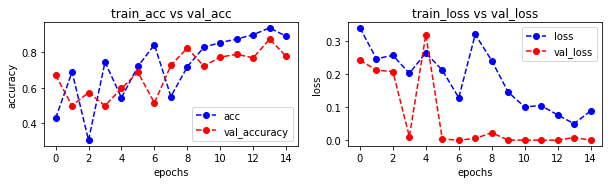

In [0]:
history = model2.fit(
      train_generator,
      steps_per_epoch=train_generator.samples // batch_size,  
      epochs=15,
      verbose=1,
      validation_data = validation_generator,
      validation_steps=validation_generator.samples // batch_size)

# ---------------------------------------------------------------------------------------------#
fig = plt.figure(figsize=(10,5))
hist = model2.history.history

# Plot accuracy
plt.subplot(221)
plt.plot(hist['accuracy'],'bo--', label = "acc")
plt.plot(hist['val_accuracy'], 'ro--', label = "val_accuracy")
plt.title("train_acc vs val_acc")
plt.ylabel("accuracy")
plt.xlabel("epochs")
plt.legend()

# Plot loss function
plt.subplot(222)
plt.plot(hist['loss'],'bo--', label = "loss")
plt.plot(hist['val_loss'], 'ro--', label = "val_loss")
plt.title("train_loss vs val_loss")
plt.ylabel("loss")
plt.xlabel("epochs")

plt.legend()
plt.show()

#### **Changed no. of epochs in base model**

Epoch 1/30
8/8 [==============================] - 6s 765ms/step - loss: 0.0089 - accuracy: 1.0000 - val_loss: 0.1664 - val_accuracy: 0.8477
Epoch 2/30
8/8 [==============================] - 7s 834ms/step - loss: 0.0052 - accuracy: 1.0000 - val_loss: 0.2162 - val_accuracy: 0.8555
Epoch 3/30
8/8 [==============================] - 5s 649ms/step - loss: 0.0033 - accuracy: 1.0000 - val_loss: 0.2450 - val_accuracy: 0.8516
Epoch 4/30
8/8 [==============================] - 7s 835ms/step - loss: 0.0034 - accuracy: 1.0000 - val_loss: 0.2336 - val_accuracy: 0.8516
Epoch 5/30
8/8 [==============================] - 6s 752ms/step - loss: 0.0030 - accuracy: 1.0000 - val_loss: 0.2492 - val_accuracy: 0.8633
Epoch 6/30
8/8 [==============================] - 6s 765ms/step - loss: 0.0016 - accuracy: 1.0000 - val_loss: 0.2190 - val_accuracy: 0.8555
Epoch 7/30
8/8 [==============================] - 5s 678ms/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 0.2488 - val_accuracy: 0.8633
Epoch 8/30
8/8 [====

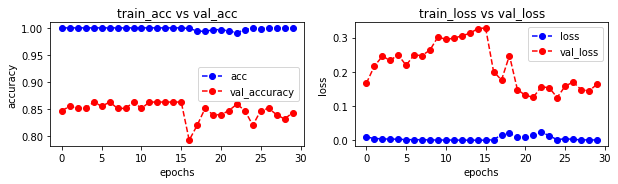

In [0]:
history = model.fit(
      train_generator,
      steps_per_epoch=train_generator.samples // batch_size,  
      epochs=30,
      verbose=1,
      validation_data = validation_generator,
      validation_steps=validation_generator.samples // batch_size)

# ---------------------------------------------------------------------------------------------#
fig = plt.figure(figsize=(10,5))
hist = model.history.history

# Plot accuracy
plt.subplot(221)
plt.plot(hist['accuracy'],'bo--', label = "acc")
plt.plot(hist['val_accuracy'], 'ro--', label = "val_accuracy")
plt.title("train_acc vs val_acc")
plt.ylabel("accuracy")
plt.xlabel("epochs")
plt.legend()

# Plot loss function
plt.subplot(222)
plt.plot(hist['loss'],'bo--', label = "loss")
plt.plot(hist['val_loss'], 'ro--', label = "val_loss")
plt.title("train_loss vs val_loss")
plt.ylabel("loss")
plt.xlabel("epochs")

plt.legend()
plt.show()

#### **Changed optimizer in base model**

In [0]:
model3 = Sequential()
model3.add(Convolution2D(16, (3,3), activation='relu', input_shape=(300, 300, 3)))
model3.add(MaxPooling2D(pool_size = (2,2))) 
# The second convolution
model3.add(Convolution2D(32, (3,3), activation='relu'))
model3.add(MaxPooling2D(pool_size = (2,2))) 
# The third convolution
model3.add(Convolution2D(64, (3,3), activation='relu'))
model3.add(MaxPooling2D(pool_size = (2,2))) 
# The fourth convolution
model3.add(Convolution2D(64, (3,3), activation='relu'))
model3.add(MaxPooling2D(pool_size = (2,2))) 
# The fifth convolution
model3.add(Convolution2D(64, (3,3), activation='relu'))
model3.add(MaxPooling2D(pool_size = (2,2))) 
# Flatten the results to feed into a DNN
model3.add(Flatten())
# 512 neuron hidden layer
model3.add(Dense(512, activation = "relu",init = 'normal'))
# Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('horses') and 1 for the other ('humans')
model3.add(Dropout(0.3))
model3.add(Dense(1, activation = "sigmoid"))

model3.compile(optimizer = 'sgd',loss = 'binary_crossentropy', metrics = ['accuracy'])
model3.summary()


Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 298, 298, 16)      448       
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 149, 149, 16)      0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 147, 147, 32)      4640      
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 71, 71, 64)        18496     
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 35, 35, 64)        0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 33, 33, 64)       

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(512, activation="relu", kernel_initializer="normal")`


Epoch 1/15
8/8 [==============================] - 6s 791ms/step - loss: 0.7152 - accuracy: 0.4928 - val_loss: 0.7012 - val_accuracy: 0.5703
Epoch 2/15
8/8 [==============================] - 6s 751ms/step - loss: 0.6957 - accuracy: 0.4494 - val_loss: 0.6443 - val_accuracy: 0.5195
Epoch 3/15
8/8 [==============================] - 6s 752ms/step - loss: 0.6911 - accuracy: 0.4360 - val_loss: 0.6291 - val_accuracy: 0.5117
Epoch 4/15
8/8 [==============================] - 6s 750ms/step - loss: 0.6773 - accuracy: 0.5907 - val_loss: 0.5854 - val_accuracy: 0.5000
Epoch 5/15
8/8 [==============================] - 6s 760ms/step - loss: 0.6691 - accuracy: 0.5740 - val_loss: 0.5474 - val_accuracy: 0.5000
Epoch 6/15
8/8 [==============================] - 7s 844ms/step - loss: 0.6958 - accuracy: 0.5166 - val_loss: 0.5715 - val_accuracy: 0.5000
Epoch 7/15
8/8 [==============================] - 6s 749ms/step - loss: 0.6663 - accuracy: 0.5895 - val_loss: 0.5303 - val_accuracy: 0.5000
Epoch 8/15
8/8 [====

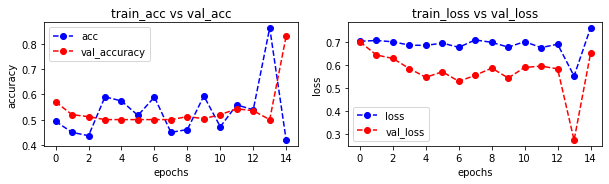

In [0]:
history = model3.fit(
      train_generator,
      steps_per_epoch=train_generator.samples // batch_size,  
      epochs=15,
      verbose=1,
      validation_data = validation_generator,
      validation_steps=validation_generator.samples // batch_size)

# ---------------------------------------------------------------------------------------------#
fig = plt.figure(figsize=(10,5))
hist = model3.history.history

# Plot accuracy
plt.subplot(221)
plt.plot(hist['accuracy'],'bo--', label = "acc")
plt.plot(hist['val_accuracy'], 'ro--', label = "val_accuracy")
plt.title("train_acc vs val_acc")
plt.ylabel("accuracy")
plt.xlabel("epochs")
plt.legend()

# Plot loss function
plt.subplot(222)
plt.plot(hist['loss'],'bo--', label = "loss")
plt.plot(hist['val_loss'], 'ro--', label = "val_loss")
plt.title("train_loss vs val_loss")
plt.ylabel("loss")
plt.xlabel("epochs")

plt.legend()
plt.show()

#### **Changed no. of convolution layer in base model**

In [0]:
model4 = Sequential()
model4.add(Convolution2D(16, (3,3), activation='relu', input_shape=(300, 300, 3)))
model4.add(MaxPooling2D(pool_size = (2,2))) 
# The second convolution
model4.add(Convolution2D(32, (3,3), activation='relu'))
model4.add(MaxPooling2D(pool_size = (2,2))) 
# Flatten the results to feed into a DNN
model4.add(Flatten())
# 512 neuron hidden layer
model4.add(Dense(512, activation = "relu",init = 'normal'))
# Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('horses') and 1 for the other ('humans')
model4.add(Dropout(0.3))
model4.add(Dense(1, activation = "sigmoid"))

model4.compile(optimizer = 'adam',loss = 'binary_crossentropy', metrics = ['accuracy'])
model4.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_21 (Conv2D)           (None, 298, 298, 16)      448       
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 149, 149, 16)      0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 147, 147, 32)      4640      
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 73, 73, 32)        0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 170528)            0         
_________________________________________________________________
dense_9 (Dense)              (None, 512)               87310848  
_________________________________________________________________
dropout_5 (Dropout)          (None, 512)              

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(512, activation="relu", kernel_initializer="normal")`
  # Remove the CWD from sys.path while we load stuff.


Epoch 1/15
8/8 [==============================] - 7s 890ms/step - loss: 38.8548 - accuracy: 0.4678 - val_loss: 20.9484 - val_accuracy: 0.5000
Epoch 2/15
8/8 [==============================] - 6s 697ms/step - loss: 5.4520 - accuracy: 0.2054 - val_loss: 0.0512 - val_accuracy: 0.5000
Epoch 3/15
8/8 [==============================] - 6s 761ms/step - loss: 1.0272 - accuracy: 0.6051 - val_loss: 2.6328 - val_accuracy: 0.5000
Epoch 4/15
8/8 [==============================] - 6s 759ms/step - loss: 1.0369 - accuracy: 0.2792 - val_loss: 0.3391 - val_accuracy: 0.5000
Epoch 5/15
8/8 [==============================] - 6s 758ms/step - loss: 0.5824 - accuracy: 0.6685 - val_loss: 0.1516 - val_accuracy: 0.5000
Epoch 6/15
8/8 [==============================] - 7s 847ms/step - loss: 0.7775 - accuracy: 0.5068 - val_loss: 0.8517 - val_accuracy: 0.4961
Epoch 7/15
8/8 [==============================] - 6s 755ms/step - loss: 0.7152 - accuracy: 0.4149 - val_loss: 0.3861 - val_accuracy: 0.6914
Epoch 8/15
8/8 [==

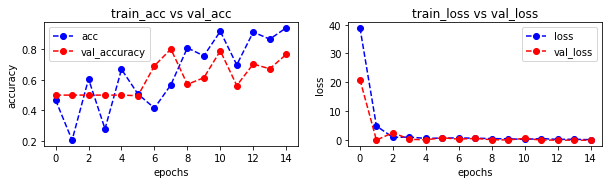

In [0]:
history = model4.fit(
      train_generator,
      steps_per_epoch=train_generator.samples // batch_size,  
      epochs=15,
      verbose=1,
      validation_data = validation_generator,
      validation_steps=validation_generator.samples // batch_size)

# ---------------------------------------------------------------------------------------------#
fig = plt.figure(figsize=(10,5))
hist = model4.history.history

# Plot accuracy
plt.subplot(221)
plt.plot(hist['accuracy'],'bo--', label = "acc")
plt.plot(hist['val_accuracy'], 'ro--', label = "val_accuracy")
plt.title("train_acc vs val_acc")
plt.ylabel("accuracy")
plt.xlabel("epochs")
plt.legend()

# Plot loss function
plt.subplot(222)
plt.plot(hist['loss'],'bo--', label = "loss")
plt.plot(hist['val_loss'], 'ro--', label = "val_loss")
plt.title("train_loss vs val_loss")
plt.ylabel("loss")
plt.xlabel("epochs")

plt.legend()
plt.show()

#### **Changed initializer in base model**

In [0]:
model5 = Sequential()
model5.add(Convolution2D(16, (3,3), activation='relu', input_shape=(300, 300, 3)))
model5.add(MaxPooling2D(pool_size = (2,2))) 
# The second convolution
model5.add(Convolution2D(32, (3,3), activation='relu'))
model5.add(MaxPooling2D(pool_size = (2,2))) 
# The third convolution
model5.add(Convolution2D(64, (3,3), activation='relu'))
model5.add(MaxPooling2D(pool_size = (2,2))) 
# The fourth convolution
model5.add(Convolution2D(64, (3,3), activation='relu'))
model5.add(MaxPooling2D(pool_size = (2,2))) 
# The fifth convolution
model5.add(Convolution2D(64, (3,3), activation='relu'))
model5.add(MaxPooling2D(pool_size = (2,2))) 
# Flatten the results to feed into a DNN
model5.add(Flatten())
# 512 neuron hidden layer
model5.add(Dense(512, activation = "relu",init = 'glorot_normal'))
# Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('horses') and 1 for the other ('humans')
model5.add(Dropout(0.3))
model5.add(Dense(1, activation = "sigmoid"))

model5.compile(optimizer = 'adam',loss = 'binary_crossentropy', metrics = ['accuracy'])
model5.summary()


Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_23 (Conv2D)           (None, 298, 298, 16)      448       
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 149, 149, 16)      0         
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 147, 147, 32)      4640      
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 71, 71, 64)        18496     
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 35, 35, 64)        0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 33, 33, 64)       

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(512, activation="relu", kernel_initializer="glorot_normal")`


Epoch 1/15
8/8 [==============================] - 7s 881ms/step - loss: 1.4173 - accuracy: 0.4229 - val_loss: 0.7085 - val_accuracy: 0.5000
Epoch 2/15
8/8 [==============================] - 6s 760ms/step - loss: 0.6939 - accuracy: 0.5228 - val_loss: 0.6807 - val_accuracy: 0.5000
Epoch 3/15
8/8 [==============================] - 6s 744ms/step - loss: 0.6927 - accuracy: 0.4438 - val_loss: 0.6779 - val_accuracy: 0.5000
Epoch 4/15
8/8 [==============================] - 5s 644ms/step - loss: 0.6881 - accuracy: 0.5194 - val_loss: 0.6645 - val_accuracy: 0.5000
Epoch 5/15
8/8 [==============================] - 6s 734ms/step - loss: 0.6939 - accuracy: 0.4305 - val_loss: 0.6448 - val_accuracy: 0.5000
Epoch 6/15
8/8 [==============================] - 7s 828ms/step - loss: 0.6809 - accuracy: 0.6367 - val_loss: 0.6211 - val_accuracy: 0.5000
Epoch 7/15
8/8 [==============================] - 5s 647ms/step - loss: 0.6405 - accuracy: 0.5207 - val_loss: 0.4850 - val_accuracy: 0.5000
Epoch 8/15
8/8 [====

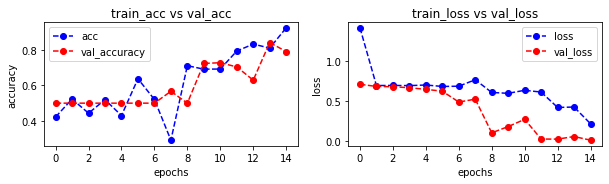

In [0]:
history = model5.fit(
      train_generator,
      steps_per_epoch=train_generator.samples // batch_size,  
      epochs=15,
      verbose=1,
      validation_data = validation_generator,
      validation_steps=validation_generator.samples // batch_size)

# ---------------------------------------------------------------------------------------------#
fig = plt.figure(figsize=(10,5))
hist = model5.history.history

# Plot accuracy
plt.subplot(221)
plt.plot(hist['accuracy'],'bo--', label = "acc")
plt.plot(hist['val_accuracy'], 'ro--', label = "val_accuracy")
plt.title("train_acc vs val_acc")
plt.ylabel("accuracy")
plt.xlabel("epochs")
plt.legend()

# Plot loss function
plt.subplot(222)
plt.plot(hist['loss'],'bo--', label = "loss")
plt.plot(hist['val_loss'], 'ro--', label = "val_loss")
plt.title("train_loss vs val_loss")
plt.ylabel("loss")
plt.xlabel("epochs")

plt.legend()
plt.show()

## **Testing Prediction on uploaded image**

Saving IMG-4682 (1).jpg to IMG-4682 (1).jpg
1.00


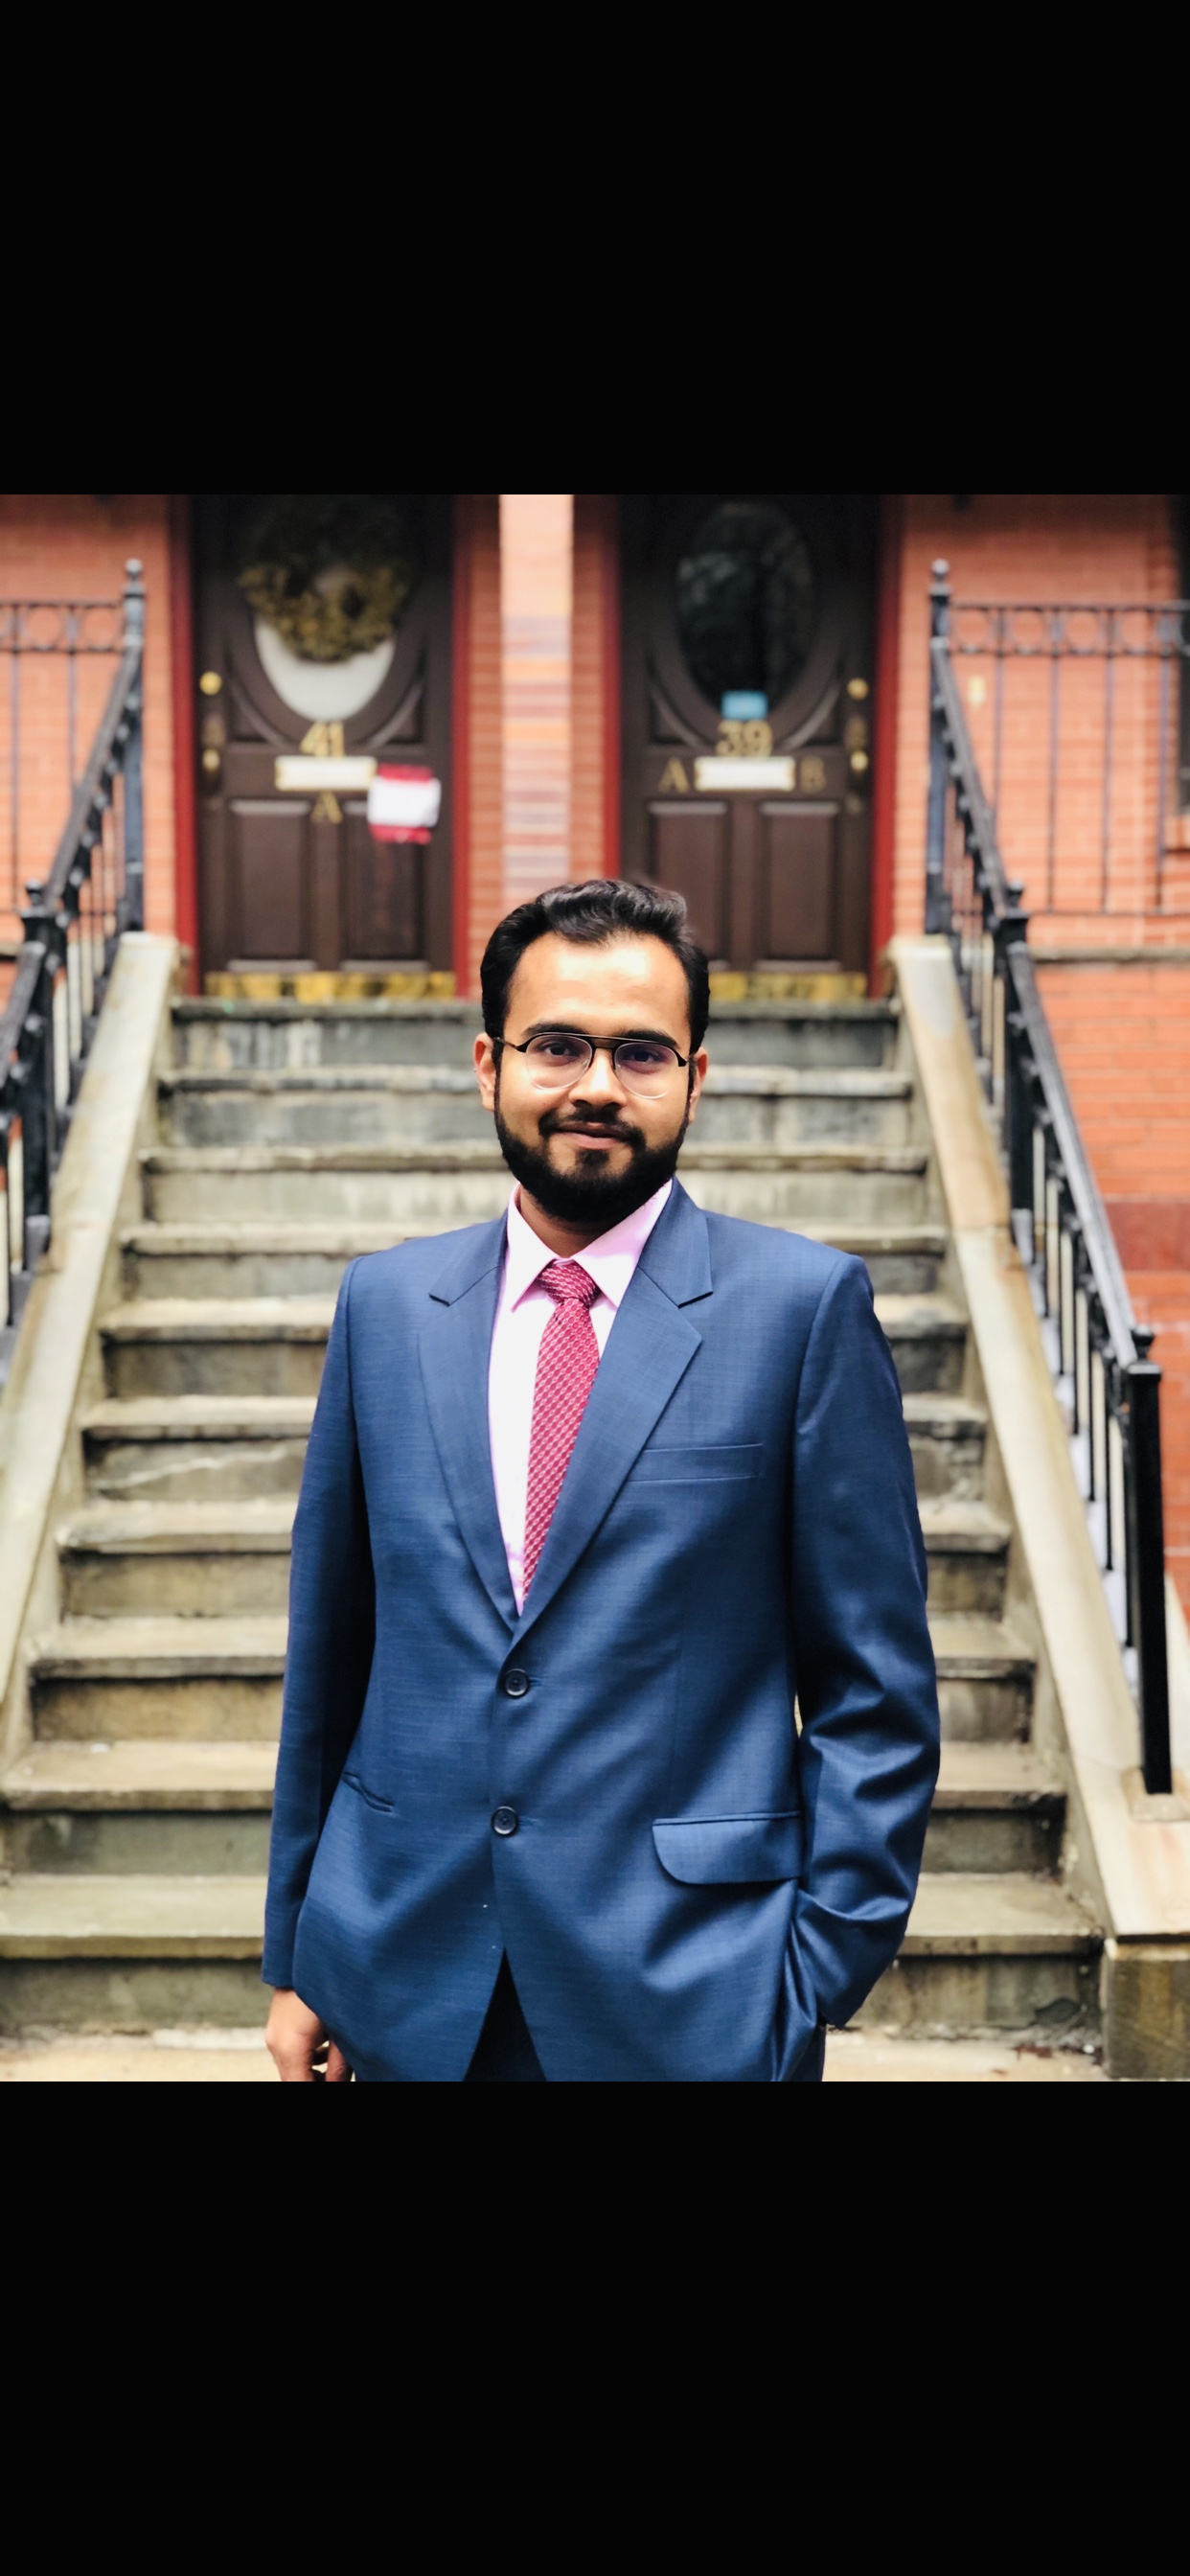

IMG-4682 (1).jpg is a human


In [0]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = '/content/' + fn
  img = image.load_img(path, target_size=(300, 300))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  
  print("%.2f" % classes[0])
  
  from IPython.display import Image
  display(Image(filename=fn))
  
  if classes[0]>0.5:
    print(fn + " is a human")
    
  else:
    print(fn + " is a horse")

## **Observations**

**1. model(Base Model)**

No. of convolution layers : **5** , Activation Function : **relu** , Optimizer : **Adam**, Loss Function : **Binary Cross Entropy**, Epoch : **15**, Initializer : **normal**

*Accuracy* :  0.9967

*Validation Accuracy* : 0.8594

**2. model1(Changed Activation function in Base Model)**

No. of convolution layers : 5 , Activation Function : **tanh** , Optimizer : Adam, Loss Function : Binary Cross Entropy, Epoch : 15, Initializer : normal

*Accuracy* :  0.9432

*Validation Accuracy* : 0.6055

**3. model2(Changed Cost Function function in Base Model)**

No. of convolution layers : 5 , Activation Function : relu , Optimizer : Adam, Loss Function : **mean_square_error**, Epoch : 15, Initializer : normal

*Accuracy* :  0.8906

*Validation Accuracy* : 0.7773

**4. model(Changed no. of epoch in Base Model)**

No. of convolution layers : 5 , Activation Function : relu , Optimizer : Adam, Loss Function : Binary Cross Entropy, Epoch : **30**, Initializer : normal

*Accuracy* :  1.000

*Validation Accuracy* : 0.8438

**5. model3(Changed optimizer fuction in Base Model)**

No. of convolution layers : 5 , Activation Function : relu , Optimizer : **sgd(Stochastic Gradient Descent)**, Loss Function : Binary Cross Entropy, Epoch : 15, Initializer : normal

*Accuracy* :  0.9393

*Validation Accuracy* : 0.8320

**6. model4(Changed no. of convolution layers in Base Model)**

No. of convolution layers : **2** , Activation Function : relu , Optimizer : Adam, Loss Function : Binary Cross Entropy, Epoch : 15, Initializer : normal

*Accuracy* :  0.4182

*Validation Accuracy* : 0.7656

**7. model5(Changed initializtion function in base model)**

No. of convolution layers : 5 , Activation Function : relu , Optimizer : Adam, Loss Function : Binary Cross Entropy, Epoch : 15, Initializer : **glorot_normal**

*Accuracy* :  0.9219

*Validation Accuracy* : 0.7891


## **Conclusion**

1. After changing activation function from relu to tanh, accuracy of model got decrease by 13.77%, but by changing activation function we cannot draw any conclusion. For relu model relu perform better.

2. After Loss function from binary_crossentropy to mean_square_error, accuracy of model got decrease by 10.7%. It is an important paramter which needs to be in cosideration during model compilation.

3. When we changed the epoch from 15 to 30 in base model accuracy of training increased and reached to 100% but validation accuracy got decrease which means model is having overfitting on training data which is an issue of model. 

4. Changing optimizer parameter from Adam to Stochastic Gradient Descent, accuracy got decreses significantly.

5. As we have changes convolution layer from 5 to 2 accuracy of model got decreased by around 55%. Generally we use convolution layer to increase accuracy of model.

6. Changing initialization parameter from nomal to Xavier normal accracy got decreased. We observed least accuracy when I used      initialization parameter as zero i.e.•	Accuracy: 0.6233 •	Validation Accuracy : 0.7345



## **Citation**

1. [TensorFlow](https://www.tensorflow.org/)
2. [Convolutional Neural Network (CNN) — Deep Learning](https://medium.com/@RaghavPrabhu/understanding-of-convolutional-neural-network-cnn-deep-learning-99760835f148)
3. [Github Reference](https://github.com/gsurma/image_classifier)


## **Contribution**

80% written by me, 20% derived from references

## **Text License**

THE WORK (AS DEFINED BELOW) IS PROVIDED UNDER THE TERMS OF THIS CREATIVE COMMONS PUBLIC LICENSE ("CCPL" OR "LICENSE"). THE WORK IS PROTECTED BY COPYRIGHT AND/OR OTHER APPLICABLE LAW. ANY USE OF THE WORK OTHER THAN AS AUTHORIZED UNDER THIS LICENSE OR COPYRIGHT LAW IS PROHIBITED.

BY EXERCISING ANY RIGHTS TO THE WORK PROVIDED HERE, YOU ACCEPT AND AGREE TO BE BOUND BY THE TERMS OF THIS LICENSE. TO THE EXTENT THIS LICENSE MAY BE CONSIDERED TO BE A CONTRACT, THE LICENSOR GRANTS YOU THE RIGHTS CONTAINED HERE IN CONSIDERATION OF YOUR ACCEPTANCE OF SUCH TERMS AND CONDITIONS.

## **Code License**

Copyright 2020 
Varsha Premani
Yashraj Swarnkar

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.